# Рубежный контроль №2

## Близнева А.Е. группа ИУ5Ц-81Б
## Вариант 26

### Задание:

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

### О наборе данных:

Классификация типов звезд  
Для сравнения всех моделей ML  
Может использоваться для прогнозирования  

Температура -- K  
L -- L/Lo  
R -- R/Ro  
AM -- Mv  
Color -- Общий цвет спектра  
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https:// en.wikipedia.org/wiki/Asteroid_spectral_types  

Тип — Красный карлик, Коричневый карлик, Белый карлик, Основная последовательность, Супергиганты, Гипергиганты  


ЦЕЛЬ:  
Тип  

от 0 до 5  

Красный карлик - 0  
Коричневый карлик - 1  
Белый карлик - 2  
Основная последовательность - 3  
Супер Гиганты - 4  
Гипергиганты - 5  
МАТЕМАТИКА:  

Lo = 3,828 x 10 ^ 26 Вт  
(средняя яркость солнца)  
Ro = 6,9551 x 10 ^ 8 м  
(средний радиус солнца)  

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO
import graphviz 
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score 
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline 
%matplotlib inline 
sns.set(style="ticks")
from IPython.display import set_matplotlib_formats
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

## Загрузка данных

In [2]:
data = pd.read_csv('Stars.csv', sep=",")

## Основные характеристики датасета

In [3]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
# Выведем размер датасета - по итогу получилось:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
total_count = data.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего строк: 240
Всего колонок: 7


In [5]:
# Выведем список колонок с их типами.
data.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [6]:
# Проверил количество пустых значений по колонкам.
for col_empty in data.columns:
    empty_count = data[data[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

Temperature - 0
L - 0
R - 0
A_M - 0
Color - 0
Spectral_Class - 0
Type - 0


Количество пустых значений означает, что все значения по этим колонкам заполнены.

### Кодирование категориальных признаков

Преобразуем цвета и спектральные классы в числовые значения (label encoding)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
# Создаем новый фрейм данных, содержащий только столбцы типа object
obj_data = data.select_dtypes(include=['object']).copy()

In [9]:
obj_data.head()

,Color,Spectral_Class
0,Red,M
1,Red,M
2,Red,M
3,Red,M
4,Red,M


In [10]:
data["Spectral_Class"].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [11]:
data["Color"].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Yellowish               1
White-Yellow            1
Pale yellow orange      1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [12]:
data["Color"] = data["Color"].astype('category')
data["Spectral_Class"] = data["Spectral_Class"].astype('category')

In [13]:
data.dtypes

Temperature          int64
L                  float64
R                  float64
A_M                float64
Color             category
Spectral_Class    category
Type                 int64
dtype: object

In [14]:
data["Color_cat"] = data["Color"].cat.codes
data["Spectral_Class_cat"] = data["Spectral_Class"].cat.codes
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_cat,Spectral_Class_cat
0,3068,0.002400,0.1700,16.12,Red,M,0,8,5
1,3042,0.000500,0.1542,16.60,Red,M,0,8,5
2,2600,0.000300,0.1020,18.70,Red,M,0,8,5
3,2800,0.000200,0.1600,16.65,Red,M,0,8,5
4,1939,0.000138,0.1030,20.06,Red,M,0,8,5


In [15]:
data = data.drop(columns='Color')
data = data.drop(columns='Spectral_Class')

In [16]:
data.head()

,Temperature,L,R,A_M,Type,Color_cat,Spectral_Class_cat
0,3068,0.002400,0.1700,16.12,0,8,5
1,3042,0.000500,0.1542,16.60,0,8,5
2,2600,0.000300,0.1020,18.70,0,8,5
3,2800,0.000200,0.1600,16.65,0,8,5
4,1939,0.000138,0.1030,20.06,0,8,5


In [17]:
data.dtypes

Temperature             int64
L                     float64
R                     float64
A_M                   float64
Type                    int64
Color_cat                int8
Spectral_Class_cat       int8
dtype: object

### Масштабирование данных

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data)
sc1_data

array([[2.96629095e-02, 2.73127546e-09, 8.29359490e-05, ...,
        0.00000000e+00, 5.00000000e-01, 8.33333333e-01],
       [2.89797956e-02, 4.94455040e-10, 7.48271124e-05, ...,
        0.00000000e+00, 5.00000000e-01, 8.33333333e-01],
       [1.73668585e-02, 2.59000259e-10, 4.80371586e-05, ...,
        0.00000000e+00, 5.00000000e-01, 8.33333333e-01],
       ...,
       [1.81025196e-01, 6.32776483e-01, 7.30304200e-01, ...,
        1.00000000e+00, 5.62500000e-01, 0.00000000e+00],
       [1.91692283e-01, 4.76725295e-01, 5.70693556e-01, ...,
        1.00000000e+00, 5.62500000e-01, 0.00000000e+00],
       [9.44352487e-01, 3.47181606e-01, 9.15062503e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Построим кореляционную матрицу

<AxesSubplot:>

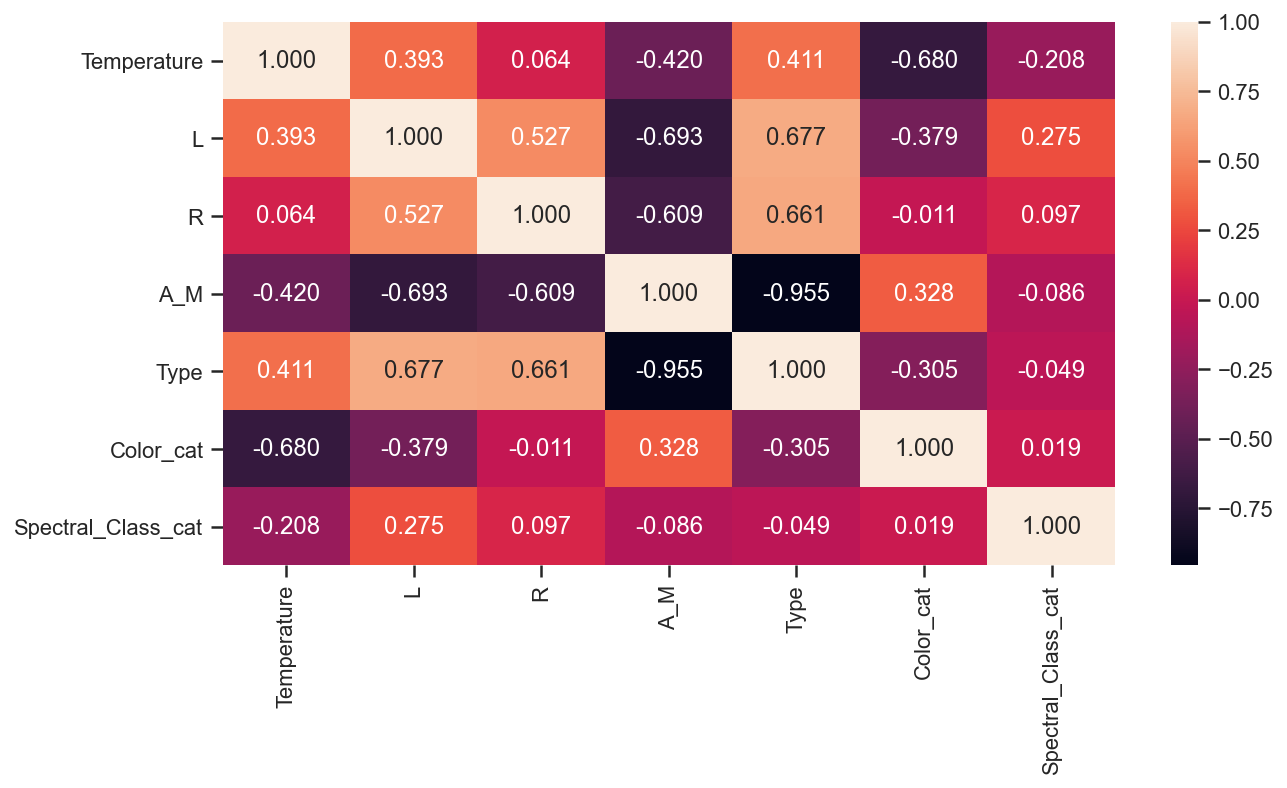

In [20]:
ig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

### Предсказание целевого признака

Предскажем значение целевого признака L.

##### Разделение выборки на обучающую и тестовую

In [21]:
X = data.drop(columns='L')
Y = data['L']

Входные данные:

In [22]:
X.head()

,Temperature,R,A_M,Type,Color_cat,Spectral_Class_cat
0,3068,0.1700,16.12,0,8,5
1,3042,0.1542,16.60,0,8,5
2,2600,0.1020,18.70,0,8,5
3,2800,0.1600,16.65,0,8,5
4,1939,0.1030,20.06,0,8,5


Выходные данные:

In [23]:
Y.head()

0    0.002400
1    0.000500
2    0.000300
3    0.000200
4    0.000138
Name: L, dtype: float64

In [24]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 2023, test_size = 0.1)

Входные параметры обучающей выборки

In [25]:
X_train.head()

,Temperature,R,A_M,Type,Color_cat,Spectral_Class_cat
192,2994,0.28000,13.45,1,8,5
123,3146,0.09320,16.92,0,8,5
140,13420,0.00981,13.67,2,1,1
8,2650,0.11000,17.45,0,8,5
30,39000,10.60000,-4.70,3,0,6


Выходные параметры обучающей выборки

In [26]:
Y_train.head()

192         0.00720
123         0.00015
140         0.00059
8           0.00069
30     204000.00000
Name: L, dtype: float64

Выходные параметры тестовой выборки

In [27]:
Y_test.head()

42     150000.000000
205         0.001560
4           0.000138
120         0.000430
74          0.004000
Name: L, dtype: float64

### Линейная регрессия

Метрики:  
MSE - подчеркнуть большие ошибки  
Median Absolute Error - оценить качество модели с устойчивостью к выбросам  
R2 - точно и наглядно интерпретировать качество модели  

In [28]:
reg = LinearRegression().fit(X_train, Y_train)

In [29]:
y_pred_test_reg = reg.predict(X_test)
y_pred_train_reg = reg.predict(X_train)
mse_reg = mean_squared_error(Y_train, y_pred_train_reg), mean_squared_error(Y_test, y_pred_test_reg)
mse_reg

(13495193454.334732, 3325123742.294554)

In [30]:
med_reg = median_absolute_error(Y_train, y_pred_train_reg), median_absolute_error(Y_test, y_pred_test_reg)
med_reg

(36697.58446980551, 35483.77026547531)

In [31]:
r2_reg = r2_score(Y_train, y_pred_train_reg), r2_score(Y_test, y_pred_test_reg)
r2_reg

(0.6052590715631364, 0.6474841820679058)

### Случайный лес

In [32]:
rf = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=1).fit(X_train, Y_train)

C:\Users\Majer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [33]:
# Out-of-bag error
rf.oob_score_, 1-rf.oob_score_

(0.362018121029148, 0.637981878970852)

In [34]:
y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)
mse_rf = mean_squared_error(Y_train, y_pred_train_rf), mean_squared_error(Y_test, y_pred_test_rf)
mse_rf

(3062614212.8272805, 10915695442.398323)

In [35]:
med_rf = median_absolute_error(Y_train, y_pred_train_rf), median_absolute_error(Y_test, y_pred_test_rf)
med_rf

(0.00253, 0.0019330000000000003)

In [36]:
r2_rf = r2_score(Y_train, y_pred_train_rf), r2_score(Y_test, y_pred_test_rf)
r2_rf

(0.910417054641995, -0.1572367242246857)

### Сравнение моделей

In [37]:
print('MSE')
print('LinearRegression: ', mse_reg)
print('RandomForest:     ', mse_rf)

MSE
LinearRegression:  (13495193454.334732, 3325123742.294554)
RandomForest:      (3062614212.8272805, 10915695442.398323)


In [38]:
print('MedAE')
print('LinearRegression: ', med_reg)
print('RandomForest:     ', med_rf)

MedAE
LinearRegression:  (36697.58446980551, 35483.77026547531)
RandomForest:      (0.00253, 0.0019330000000000003)


In [39]:
print('R2')
print('LinearRegression: ', r2_reg)
print('RandomForest:     ', r2_rf)

R2
LinearRegression:  (0.6052590715631364, 0.6474841820679058)
RandomForest:      (0.910417054641995, -0.1572367242246857)


## Вывод:
По результатам сравнения качества двух моделей на основе трех метрик - MSE, MedAE и R2, можно сделать вывод о том, что модель RandomForest показывает более высокое качество, чем модель LinearRegression. Это говорит о более высокой эффективности RandomForest в прогнозировании. 
Метрика R2, которая показывает, насколько хорошо модель соответствует данным, также подтверждает более высокое качество модели RandomForest.  